# Carbon Emission Analysis
This project focuses on analyzing global carbon emissions, examining emissions at both the country and sector levels. The project then narrows down to a specific country to observe the evolution of emissions over the past few years. Through data analysis and visualization, the project aims to provide insights into carbon emissions patterns, contributing to a better understanding of their global impact.

## I. Importing Libraries

In [1]:
!pip freeze > requirements.txt

In [3]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as pg

import plotly.express as px
import chart_studio.plotly as py

## II. Importing the Data

In [4]:
df_carbon_emission = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

## III. Exploring the Data

First we'll try to have an idea about the features presented in this dataset, by exploring the columns 

In [5]:
df_carbon_emission.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [6]:
df_carbon_emission.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

In [7]:
df_carbon_emission.describe()

Year         Total          Coal           Oil           Gas  \
count  63104.000000  62904.000000  21744.000000  21717.000000  21618.000000   
mean    1885.500000     55.224788     73.968916     55.760624     23.504285   
std       78.519728    824.845435    598.986992    519.034563    247.674772   
min     1750.000000      0.000000      0.000000      0.000000      0.000000   
25%     1817.750000      0.000000      0.000000      0.091600      0.000000   
50%     1885.500000      0.000000      0.271852      1.044240      0.000000   
75%     1953.250000      0.549342      6.736411      8.339752      0.581628   
max     2021.000000  37123.850352  15051.512770  12345.653374   7921.829472   

             Cement       Flaring        Other    Per Capita  
count  20814.000000  21550.000000  1620.000000  18974.000000  
mean       4.330443      1.712695    10.951389      4.413363  
std       50.305770     16.727067    39.034073     17.432815  
min        0.000000      0.000000     0.000000      0.000000  
25%        0.000000      0.000000     0.520885      0.197866  
50%        0.022756      0.000000     1.255329      1.303949  
75%        0.568502      0.000000     4.385471      5.077994  
max     1672.592372    439.253991   306.638573    834.192642

In [8]:
df_carbon_emission

Country ISO 3166-1 alpha-3  Year         Total          Coal  \
0      Afghanistan                AFG  1750      0.000000           NaN   
1      Afghanistan                AFG  1751      0.000000           NaN   
2      Afghanistan                AFG  1752      0.000000           NaN   
3      Afghanistan                AFG  1753      0.000000           NaN   
4      Afghanistan                AFG  1754      0.000000           NaN   
...            ...                ...   ...           ...           ...   
63099       Global                WLD  2017  36096.739276  14506.973805   
63100       Global                WLD  2018  36826.506600  14746.830688   
63101       Global                WLD  2019  37082.558969  14725.978025   
63102       Global                WLD  2020  35264.085734  14174.564010   
63103       Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
0               NaN          NaN          NaN         NaN         NaN   
1               NaN          NaN          NaN         NaN         NaN   
2               NaN          NaN          NaN         NaN         NaN   
3               NaN          NaN          NaN         NaN         NaN   
4               NaN          NaN          NaN         NaN         NaN   
...             ...          ...          ...         ...         ...   
63099  12242.627935  7144.928128  1507.923185  391.992176  302.294047   
63100  12266.016285  7529.846784  1569.218392  412.115746  302.478706   
63101  12345.653374  7647.528220  1617.506786  439.253991  306.638573   
63102  11191.808551  7556.290283  1637.537532  407.583673  296.301685   
63103  11837.159116  7921.829472  1672.592372  416.525563  296.145746   

       Per Capita  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
63099    4.749682  
63100    4.792753  
63101    4.775633  
63102    4.497423  
63103    4.693699  

[63104 rows x 11 columns]

### Checking the duplicates and nulls


In [9]:
# checking duplicated rows
duplicate_check = df_carbon_emission.duplicated(keep=False).sum()
print(duplicate_check)

0


In [10]:
# Checking the nulls
df_carbon_emission.isnull().sum().sort_values()

Country                   0
Year                      0
Total                   200
ISO 3166-1 alpha-3     1632
Coal                  41360
Oil                   41387
Gas                   41486
Flaring               41554
Cement                42290
Per Capita            44130
Other                 61484
dtype: int64

In [11]:
#Checking countries with no ISO Code 
df_carbon_emission[df_carbon_emission['ISO 3166-1 alpha-3'].isna()==True]

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  \
19312  French Equatorial Africa                NaN  1750    0.0   NaN  NaN   
19313  French Equatorial Africa                NaN  1751    0.0   NaN  NaN   
19314  French Equatorial Africa                NaN  1752    0.0   NaN  NaN   
19315  French Equatorial Africa                NaN  1753    0.0   NaN  NaN   
19316  French Equatorial Africa                NaN  1754    0.0   NaN  NaN   
...                         ...                ...   ...    ...   ...  ...   
47867            Ryukyu Islands                NaN  2017    0.0   NaN  NaN   
47868            Ryukyu Islands                NaN  2018    0.0   NaN  NaN   
47869            Ryukyu Islands                NaN  2019    0.0   NaN  NaN   
47870            Ryukyu Islands                NaN  2020    0.0   NaN  NaN   
47871            Ryukyu Islands                NaN  2021    0.0   NaN  NaN   

       Gas  Cement  Flaring  Other  Per Capita  
19312  NaN     NaN      NaN    NaN         NaN  
19313  NaN     NaN      NaN    NaN         NaN  
19314  NaN     NaN      NaN    NaN         NaN  
19315  NaN     NaN      NaN    NaN         NaN  
19316  NaN     NaN      NaN    NaN         NaN  
...    ...     ...      ...    ...         ...  
47867  NaN     NaN      NaN    NaN         0.0  
47868  NaN     NaN      NaN    NaN         0.0  
47869  NaN     NaN      NaN    NaN         0.0  
47870  NaN     NaN      NaN    NaN         0.0  
47871  NaN     NaN      NaN    NaN         0.0  

[1632 rows x 11 columns]

In [12]:
#Listing the countries with no ISO Code 
countries_with_no_iso = list(df_carbon_emission[df_carbon_emission['ISO 3166-1 alpha-3'].isna()==True]['Country'].unique())
print(countries_with_no_iso)
len(countries_with_no_iso)

['French Equatorial Africa', 'French West Africa', 'Kuwaiti Oil Fires', 'Leeward Islands', 'Pacific Islands (Palau)', 'Ryukyu Islands']


6

### Observations

- There is 6 small countries with no ISO code, we can simplify the data set by removing them
- There is too much Null values in countries's emission, we might assume that if a coutry doesnt have any emissions then that to be zero (all the numerical columns)
- In the country columns we have "Global" and "International Transport", that represent that represent the aggregate emission levels across these two categories
it would be interesseting to split them from the dataset for visualizing exclusively countries emission levels



## IV. Cleaning the Data

Following the previous observations we'll try to isolate the countries labeled 'Global' and 'International Transport' from the dataset 
We'll be removing the small country with no ISO codes, and filling the Null values of emission by zero to simplify the counting 

In [13]:
#droping the six countries with no ISO code
df_carbon_emission = df_carbon_emission[~df_carbon_emission['Country'].isin(countries_with_no_iso)]

In [14]:
#assuming zero emission for countries that have null, as a simplification for the lack of data
df_carbon_emission.fillna(0,inplace=True)

C:\Users\ELYAMAM\AppData\Local\Temp\ipykernel_8936\1475105466.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
#Removing 'Global' and 'International Transport' emission values to keep only countries emission level 
df_global = df_carbon_emission[df_carbon_emission['Country'] == 'Global']
df_international_transport = df_carbon_emission[df_carbon_emission['Country'] == 'International Transport']

df_carbon_emission = df_carbon_emission[(df_carbon_emission['Country'] != 'Global') & (df_carbon_emission['Country'] != 'International Transport')]

## IV. Visualization 

In this section, the project aims to visually rank countries based on their carbon emissions using bar charts and pie charts. These visualizations will help dissect the distribution of emissions by levels and sectors, allowing us to identify the major contributors. Additionally, the project will analyze the trend of emissions over time, providing insights into how emissions have changed. By presenting the data in a visual format, this project enhances the understanding of carbon emissions and their impact on a global scale.

### 1. Ranking the countries by emission levels

In [16]:
# Ranking the countries by emission levels using bars

countries = list(df_carbon_emission.groupby('Country').sum().sort_values(by='Total', ascending = False).index)
emission = list(df_carbon_emission.groupby('Country').sum().sort_values(by='Total', ascending = False)['Total'])

plt.figure(figsize =(6,3))
plt.rcParams['font.size'] = 8.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Top 10 countries in terms of carbon emission (MtCO2) over time")


sns.set_style('darkgrid')
sns.barplot(x = countries[:10] , y = emission[:10] , palette='Set2' , edgecolor='.2')

C:\Users\ELYAMAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



<Axes: title={'center': 'Top 10 countries in terms of carbon emission (MtCO2) over time'}>

In [17]:
# Ranking the countries by emission levels using pie

plt.figure(figsize = (8,4))
plt.rcParams['font.size'] = 8.0
plt.pie(emission[:10], labels = countries[:10], autopct='%1.2f%%')
plt.axis('equal')
plt.title("Top 10 countries in terms of carbon emission (MtCO2) over time")

Text(0.5, 1.0, 'Top 10 countries in terms of carbon emission (MtCO2) over time')

### Observation N°1

- Across multiple years, the United States remains the dominant emitter of CO2, followed by China. However, when considering emissions per capita, it becomes evident that the United States emits a significantly higher amount per person compared to other countries.


### 2. One Country Focus : Morocco ! 

In [18]:
# Focsing on one country : Morocco 

morocco_data = df_carbon_emission[df_carbon_emission['Country']== "Morocco"]

In [19]:
# Morocco's emission over the past 10 years

morocco_past_10 = morocco_data[-10:]
morocco_past_10

Country ISO 3166-1 alpha-3  Year      Total       Coal        Oil  \
37526  Morocco                MAR  2012  56.953540  11.461719  37.257914   
37527  Morocco                MAR  2013  56.606417  11.211840  36.973424   
37528  Morocco                MAR  2014  57.174916  15.299893  34.457733   
37529  Morocco                MAR  2015  58.495177  16.843408  34.078864   
37530  Morocco                MAR  2016  58.457476  16.235184  34.654112   
37531  Morocco                MAR  2017  61.472122  16.876384  36.830528   
37532  Morocco                MAR  2018  63.010039  19.519260  35.792028   
37533  Morocco                MAR  2019  68.607540  25.259616  36.343216   
37534  Morocco                MAR  2020  64.720322  25.361260  32.794844   
37535  Morocco                MAR  2021  70.577665  27.844789  36.158632   

            Gas    Cement  Flaring  Other  Per Capita  
37526  2.396408  5.837500      0.0    0.0    1.707641  
37527  2.348624  6.072529      0.0    0.0    1.674571  
37528  2.245889  5.171400      0.0    0.0    1.669409  
37529  2.322976  5.249929      0.0    0.0    1.686690  
37530  2.363280  5.204900      0.0    0.0    1.665111  
37531  2.344960  5.420250      0.0    0.0    1.730239  
37532  2.114251  5.584500      0.0    0.0    1.753810  
37533  2.004208  5.000500      0.0    0.0    1.889785  
37534  1.563719  5.000500      0.0    0.0    1.764036  
37535  1.573744  5.000500      0.0    0.0    1.903564

C:\Users\ELYAMAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ELYAMAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'CO2 emisstion trend in Morocco over last 10 years (MtCO2)')

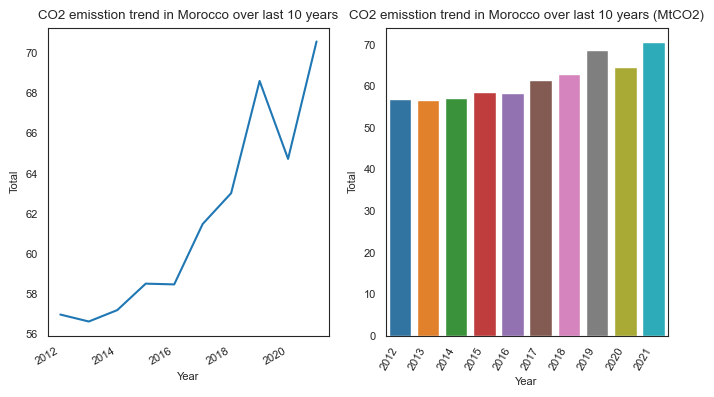

In [20]:
# Plotting Morocco's emission trend 

plt.figure(figsize=(8,4))
#removing the grid from seasborn plots 
sns.set_style('white')

plt.subplot(121)
sns.lineplot(x='Year',y='Total',data=morocco_past_10)  
plt.rcParams['font.size'] = 8
plt.xticks(rotation = 30, ha = 'right')
plt.title("CO2 emisstion trend in Morocco over last 10 years")

plt.subplot(122)
sns.barplot(x='Year',y='Total',data=morocco_past_10)

plt.xticks(rotation = 60, ha = 'right')
plt.title("CO2 emisstion trend in Morocco over last 10 years (MtCO2)")

### Observation N°2

- Similar to many other countries, Morocco experienced a dip in emissions in 2020, likely attributable to the impact of COVID-19 and subsequent lockdown measures. However, despite this temporary decrease, the overall trend of emissions in Morocco has shown a steady increase over the past decade.


### 3. Across sector comparison 

In the following analysis, we will assess the levels of carbon emissions by sector and identify the sector that contributes the most to CO2 emissions.

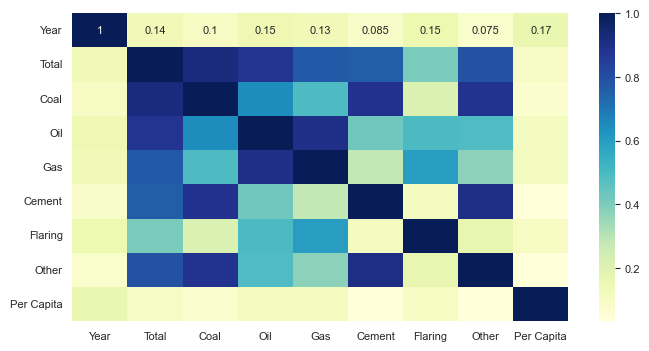

In [27]:
# Corralation between the emission

#First we adjust the dataframe removing the string columns, keeping only the float 
df_adjusted_emissions = df_carbon_emission.drop(['Country', 'ISO 3166-1 alpha-3'] , axis=1)


plt.figure(figsize = (8,4))
sns.heatmap(df_adjusted_emissions.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

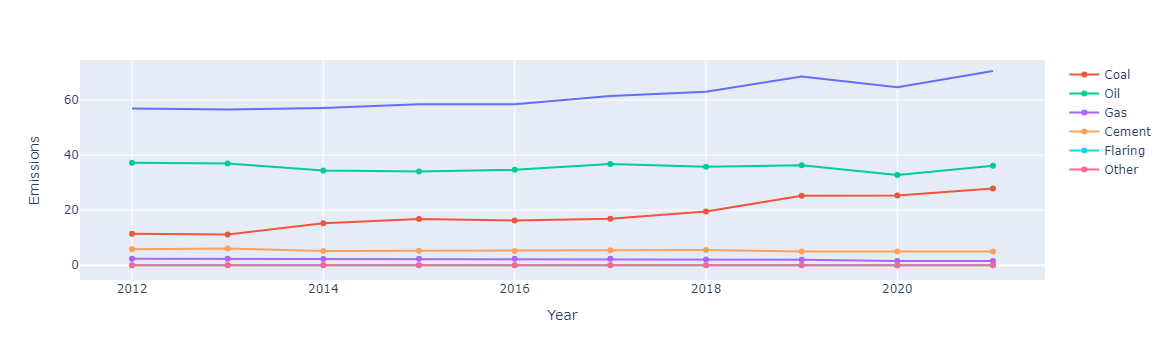

<Figure size 800x400 with 0 Axes>

In [28]:
#Trend of all types of emissions over last 10 years
columns = ['Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other']
plt.figure(figsize=(8,4))
fig = px.line(y=morocco_past_10['Total'],x=morocco_past_10['Year'],labels={'x':'Year','y':'Emissions'})
for i in columns:
    fig.add_scatter(y=morocco_past_10[str(i)],x=morocco_past_10['Year'],name=str(i))
fig.show()

C:\Users\ELYAMAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\ELYAMAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



Text(0.5, 1.0, 'Morocco')

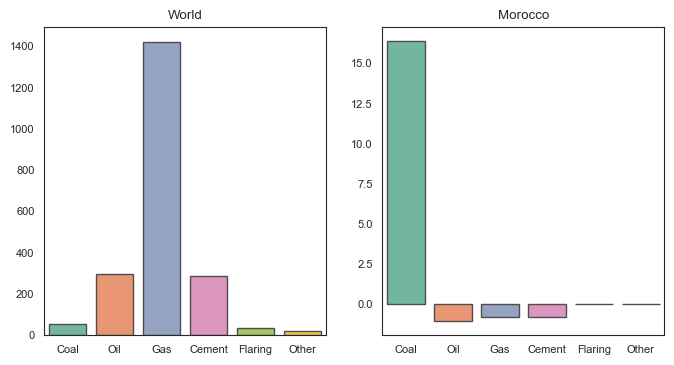

In [29]:
#During the last 10 years which emissions gained higher amongst all
plt.figure(figsize=(8,4))
global_past_10 = df_global[-10:]
values_global = []
for i in columns:
    values_global.append(global_past_10.iloc[9][str(i)]-global_past_10.iloc[0][str(i)])
values_morocco = []
for i in columns:
    values_morocco.append(morocco_past_10.iloc[9][str(i)]-morocco_past_10.iloc[0][str(i)])
plt.subplot(121)
sns.barplot(x=columns,y=values_global,palette='Set2',edgecolor='.3')
plt.title('World')
plt.subplot(122)
sns.barplot(x=columns,y=values_morocco,palette='Set2',edgecolor='.3')    
plt.title('Morocco')

### Observation N°3

- "*Correlation did not quiet work but well guess I tried, A for the effort ples :)*" 
- Coal is very much predominant in the Morocco, 
- Compared to the world, Morocco has know a relatively decent decrease over the last 10 years in emission related to sectors such as Oil Gas and Cement, for flaring and other the values stated stable, mostly due to the lack of data 


## V. Geographical Visualization 

In the upcoming section, we will utilize an interactive world map chart to visually represent emissions and gain a better understanding of the locations of the highest emitters. 

In [30]:
#Geographical Plots sector wise
data_past_10 = df_carbon_emission[df_carbon_emission['Year']>=2011]

In [31]:
data_past_10

Country ISO 3166-1 alpha-3  Year      Total      Coal       Oil  \
261    Afghanistan                AFG  2011  11.838316  4.180624  7.335328   
262    Afghanistan                AFG  2012  10.035314  3.125392  6.573216   
263    Afghanistan                AFG  2013   9.250510  3.326912  5.591264   
264    Afghanistan                AFG  2014   9.170309  3.705783  5.164638   
265    Afghanistan                AFG  2015   9.791093  2.843264  6.624512   
...            ...                ...   ...        ...       ...       ...   
62555     Zimbabwe                ZWE  2017   9.596071  5.900452  3.226752   
62556     Zimbabwe                ZWE  2018  11.795478  7.177776  4.059712   
62557     Zimbabwe                ZWE  2019  11.114607  6.888320  3.656672   
62558     Zimbabwe                ZWE  2020  10.607897  6.721571  3.316712   
62559     Zimbabwe                ZWE  2021  11.296114  7.225620  3.500879   

            Gas    Cement  Flaring  Other  Per Capita  
261    0.307776  0.014588      0.0    0.0    0.404740  
262    0.307776  0.028930      0.0    0.0    0.329389  
263    0.296784  0.035550      0.0    0.0    0.293283  
264    0.271244  0.028644      0.0    0.0    0.280299  
265    0.282128  0.041189      0.0    0.0    0.290076  
...         ...       ...      ...    ...         ...  
62555  0.000000  0.468867      0.0    0.0    0.650533  
62556  0.000000  0.557990      0.0    0.0    0.783639  
62557  0.000000  0.569615      0.0    0.0    0.723861  
62558  0.000000  0.569615      0.0    0.0    0.676970  
62559  0.000000  0.569615      0.0    0.0    0.706293  

[2464 rows x 11 columns]

In [32]:
max_emission_past_10 = data_past_10.groupby('Country').max().reset_index()

In [33]:
countries = max_emission_past_10['Country'].values
ISO = []
for i in countries:
    ISO.append(max_emission_past_10[max_emission_past_10['Country']==str(i)]['ISO 3166-1 alpha-3'].unique()[0])

In [34]:
cols = ['Total']+columns
cols.append('Per Capita')

In [36]:
# Setting the colors pallets that we'll be using for our maps
colors = ['magenta','gnbu','purp','turbo','ice','curl','oxy','haline']

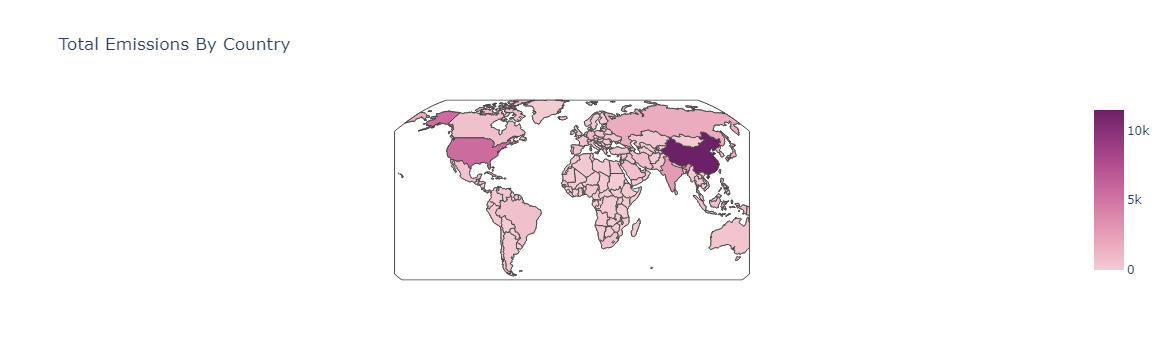

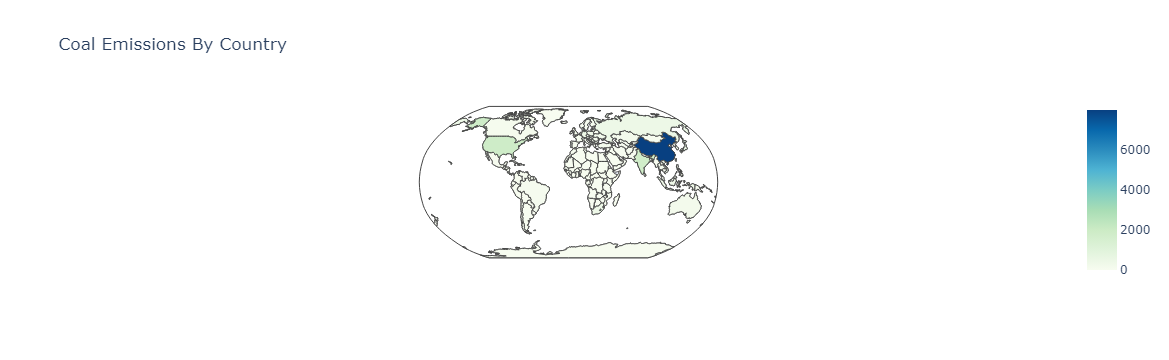

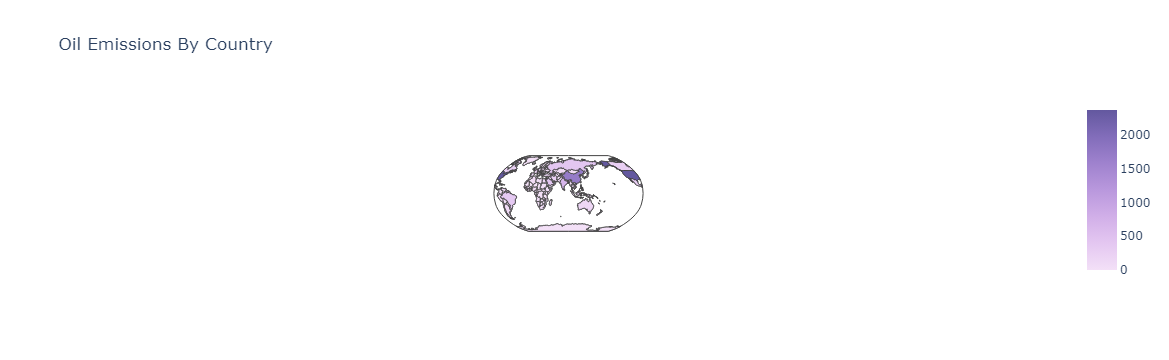

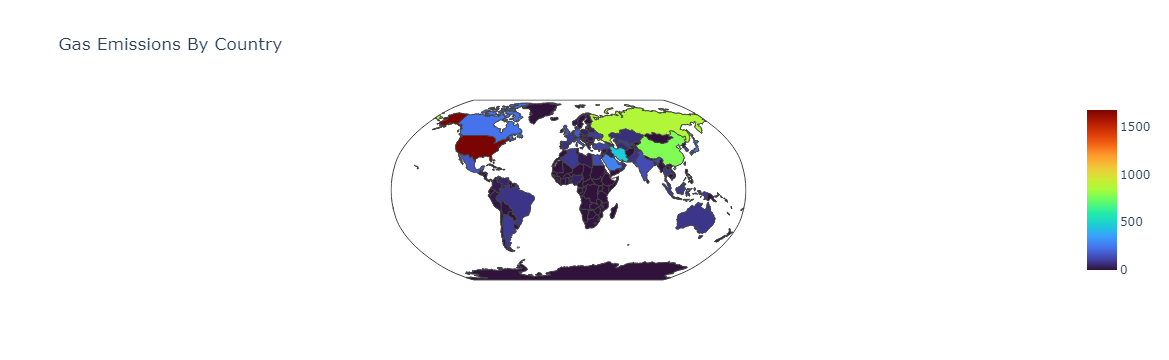

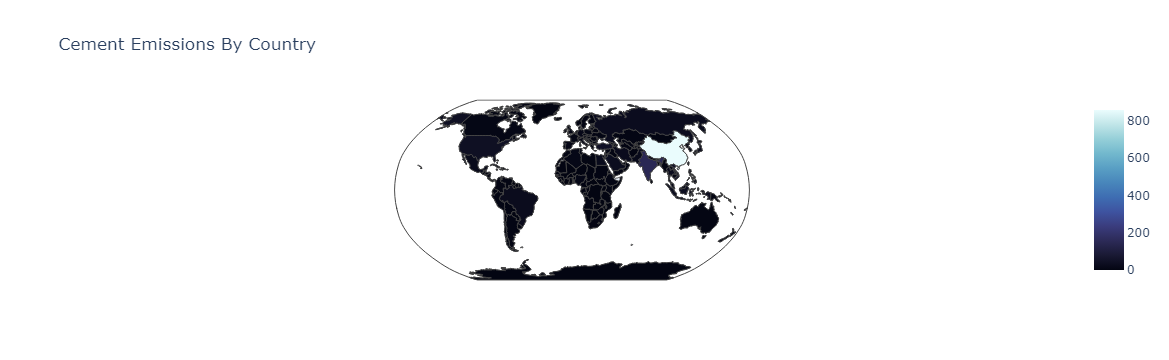

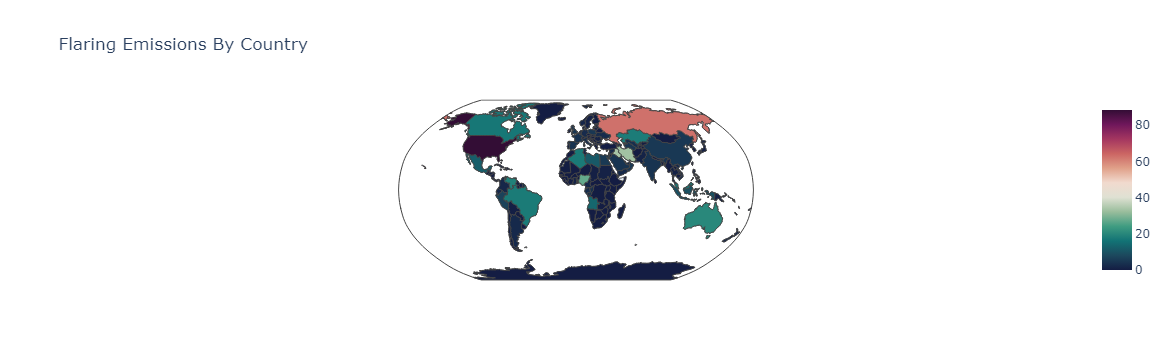

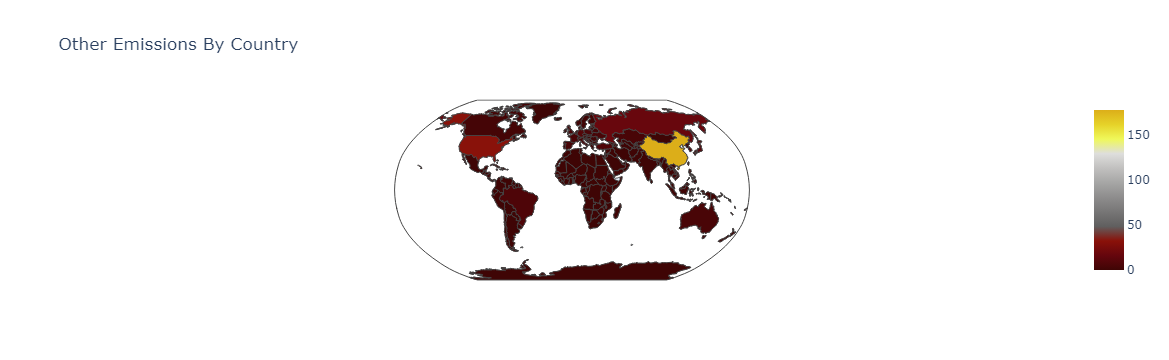

In [182]:
for index,i in enumerate(cols):
    data = dict(type='choropleth', 
                colorscale = str(colors[index]),
                locations = ISO, 
                z = max_emission_past_10[str(i)])
    if i!='Per Capita':
        layout = dict(title = str(i)+ ' Emissions By Country',
                      geo = dict( projection = {'type':'robinson'},
                                 showlakes = False))
    else:
        layout = dict(title = 'Per Capita By Country',
                      geo = dict( projection = {'type':'robinson'},
                                 showlakes = False))
    x = pg.Figure(data = [data], 
                  layout = layout)
    po.iplot(x)

# Conclusion 

The United States and China consistently emerge as the top global CO2 emitters, with the United States having a particularly high per capita emissions rate. This highlights the need for both countries to take substantial measures to reduce their carbon footprint and transition to more sustainable practices.

Despite a temporary dip in emissions in 2020 due to the COVID-19 pandemic and subsequent lockdown measureCountries around the world not just Morocco co has shown an overall increasing trend in emissions over the past decac.


The prevalence of coal as the primary energy sourdevelopping countries like moroccoorocco underscores the importance of transitioning towards cleaner and more renewable energy alternatives. This shift away from coal would not only reduce carbon emissions but also contribute to improved air quality and public heanging.


In conclusion, the project highlights the ongoing challenges of carbon emissions globally and within Morocco. It underscores the importance of comprehensive strategies and actions aimed at reducing emissions, transitioning to cleaner energy sources, and addressing sector-specific challenges. By prioritizing sustainability and implementing targeted measures, we can work towards mitigating the environmental impact and achieving a more sustainable future.lls